# Palmer Penguins Modeling
## Author: David Greco
### 11/14/24

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [42]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from palmerpenguins import load_penguins
import numpy as np
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report, roc_curve, auc,roc_auc_score


penguins = load_penguins()
penguins.dropna(inplace=True)

In [43]:
X = penguins.drop("species", axis = 1)
y = penguins["species"]
y = y.astype('category')

label_encoder = LabelEncoder()
label_encoder.fit(y)

y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

### kNN Model 1 K=4

In [44]:
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island"]),
    ("standardize", StandardScaler(), ["bill_length_mm",  "flipper_length_mm", "body_mass_g","bill_depth_mm"])
  ],
  remainder = "drop"
)


knn_4_pipeline = Pipeline([
    ('preprocessor', ct),
    ('knn', KNeighborsClassifier(n_neighbors=4))
])

knn1 = knn_4_pipeline.fit(X, y)

y_train_pred = knn1.predict(X_train)
y_test_pred = knn1.predict(X_test)


# Calculate MSE for training and testing data
train_mse1 = mean_squared_error(y_train, y_train_pred)
test_mse1 = mean_squared_error(y_test, y_test_pred)
r1 = r2_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Compute Overall Accuracy
overall_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

# Compute Precision, Recall, and F1-Score for each class
class_report_dict = classification_report(
    y_test,
    y_test_pred,
    target_names=label_encoder.classes_,
    output_dict=True
)

# Access precision, recall, and F1-score for each class
for class_name, metrics in class_report_dict.items():
    if class_name in label_encoder.classes_:  # Ensure it's a class, not 'accuracy' or 'macro avg'
        precision = metrics['precision']
        recall = metrics['recall']
        f1_score = metrics['f1-score']
        print(f"\nClass: {class_name}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1_score:.4f}")


Confusion Matrix:
 [[31  0  0]
 [ 0 19  0]
 [ 0  0 34]]

Overall Accuracy: 1.0000

Class: Adelie
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class: Chinstrap
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class: Gentoo
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


### kNN Model 2 K=3

In [ ]:
knn3_pipeline = Pipeline([
    ('preprocessor', ct),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

knn2 = knn3_pipeline.fit(X, y)

y_train_pred = knn1.predict(X_train)
y_test_pred = knn1.predict(X_test)

train_mse2 = mean_squared_error(y_train, y_train_pred)
test_mse2 = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

conf_matrix2 = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix2)

overall_accuracy2 = accuracy_score(y_test, y_test_pred)
print(f"\nOverall Accuracy: {overall_accuracy2:.4f}")

class_report_dict = classification_report(
    y_test,
    y_test_pred,
    target_names=label_encoder.classes_,
    output_dict=True
)

for class_name, metrics in class_report_dict.items():
    if class_name in label_encoder.classes_:  
        precision2 = metrics['precision']
        recall2 = metrics['recall']
        f1_score2 = metrics['f1-score']
        print(f"\nClass: {class_name}")
        print(f"  Precision: {precision2:.4f}")
        print(f"  Recall: {recall2:.4f}")
        print(f"  F1-Score: {f1_score2:.4f}")


Confusion Matrix:
 [[31  0  0]
 [ 0 19  0]
 [ 0  0 34]]

Overall Accuracy: 1.0000

Class: Adelie
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class: Chinstrap
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class: Gentoo
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


### Decision Tree at depth 3

In [ ]:
decision_tree_pipeline = Pipeline([
    ('preprocessor', ct),
    ('decision_tree', DecisionTreeClassifier(max_depth=3))
])

dt_model = decision_tree_pipeline.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

train_mse_dt = mean_squared_error(y_train, y_train_pred)
test_mse_dt = mean_squared_error(y_test, y_test_pred)
r2_dt = r2_score(y_test, y_test_pred)

conf_matrix_dt = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix_dt)

overall_accuracy_dt = accuracy_score(y_test, y_test_pred)
print(f"\nOverall Accuracy: {overall_accuracy_dt:.4f}")

class_report_dict = classification_report(
    y_test,
    y_test_pred,
    target_names=label_encoder.classes_,
    output_dict=True
)

for class_name, metrics in class_report_dict.items():
    if class_name in label_encoder.classes_:  
        precision3 = metrics['precision']
        recall3 = metrics['recall']
        f1_score3 = metrics['f1-score']
        print(f"\nClass: {class_name}")
        print(f"  Precision: {precision3:.4f}")
        print(f"  Recall: {recall3:.4f}")
        print(f"  F1-Score: {f1_score3:.4f}")


Confusion Matrix:
 [[30  1  0]
 [ 3 16  0]
 [ 0  0 34]]

Overall Accuracy: 0.9524

Class: Adelie
  Precision: 0.9091
  Recall: 0.9677
  F1-Score: 0.9375

Class: Chinstrap
  Precision: 0.9412
  Recall: 0.8421
  F1-Score: 0.8889

Class: Gentoo
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


### Decison Tree at depth 8

In [ ]:
decision_tree_pipeline2 = Pipeline([
    ('preprocessor', ct),
    ('decision_tree', DecisionTreeClassifier(max_depth=8))
])

dt_model2 = decision_tree_pipeline2.fit(X_train, y_train)

y_train_pred = dt_model2.predict(X_train)
y_test_pred = dt_model2.predict(X_test)

train_mse_dt2 = mean_squared_error(y_train, y_train_pred)
test_mse_dt2 = mean_squared_error(y_test, y_test_pred)
r2_dt2 = r2_score(y_test, y_test_pred)

conf_matrix_dt2 = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix_dt2)

overall_accuracy_dt2 = accuracy_score(y_test, y_test_pred)
print(f"\nOverall Accuracy: {overall_accuracy_dt2:.4f}")


class_report_dict = classification_report(
    y_test,
    y_test_pred,
    target_names=label_encoder.classes_,
    output_dict=True
)

for class_name, metrics in class_report_dict.items():
    if class_name in label_encoder.classes_:  
        precision4 = metrics['precision']
        recall4 = metrics['recall']
        f1_score4 = metrics['f1-score']
        print(f"\nClass: {class_name}")
        print(f"  Precision: {precision4:.4f}")
        print(f"  Recall: {recall4:.4f}")
        print(f"  F1-Score: {f1_score4:.4f}")


Confusion Matrix:
 [[30  1  0]
 [ 4 15  0]
 [ 0  0 34]]

Overall Accuracy: 0.9405

Class: Adelie
  Precision: 0.8824
  Recall: 0.9677
  F1-Score: 0.9231

Class: Chinstrap
  Precision: 0.9375
  Recall: 0.7895
  F1-Score: 0.8571

Class: Gentoo
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


### New DataFrame Results:

In [49]:
fit_results1 = pd.DataFrame({
    "Model": ["KNN (K=3)", "KNN (K=5)", "Decision Tree (Max=3)","Decision Tree (Max=10)"],
    "Confusion Matrix": [conf_matrix,conf_matrix2, conf_matrix_dt, conf_matrix_dt2],
    "Accuracy": [overall_accuracy,overall_accuracy2,overall_accuracy_dt,overall_accuracy_dt2],
    "Precision": [precision,precision2,precision3,precision4],
    "Recall": [recall,recall2,recall3,recall4],
    "F1-Score": [f1_score,f1_score2,f1_score3,f1_score4]
})

fit_results1

,Model,Confusion Matrix,Accuracy,Precision,Recall,F1-Score
0,KNN (K=3),"[[31, 0, 0], [0, 19, 0], [0, 0, 34]]",1.000000,1.0,1.0,1.0
1,KNN (K=5),"[[31, 0, 0], [0, 19, 0], [0, 0, 34]]",1.000000,1.0,1.0,1.0
2,Decision Tree (Max=3),"[[30, 1, 0], [3, 16, 0], [0, 0, 34]]",0.952381,1.0,1.0,1.0
3,Decision Tree (Max=10),"[[30, 1, 0], [4, 15, 0], [0, 0, 34]]",0.940476,1.0,1.0,1.0


### ROC Curve Creation:

In [51]:
species_index = 0  

y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

y_test_species = y_test_bin[:, species_index]
y_test_pred_prob_dt2 = decision_tree_pipeline2.predict_proba(X_test)

y_test_pred_prob_species = y_test_pred_prob_dt2[:, species_index]

fpr, tpr, thresholds = roc_curve(y_test_species, y_test_pred_prob_species)
roc_auc = auc(fpr, tpr)

roc_data = pd.DataFrame({
    "FPR": fpr,
    "TPR": tpr
})

### ROC Curve

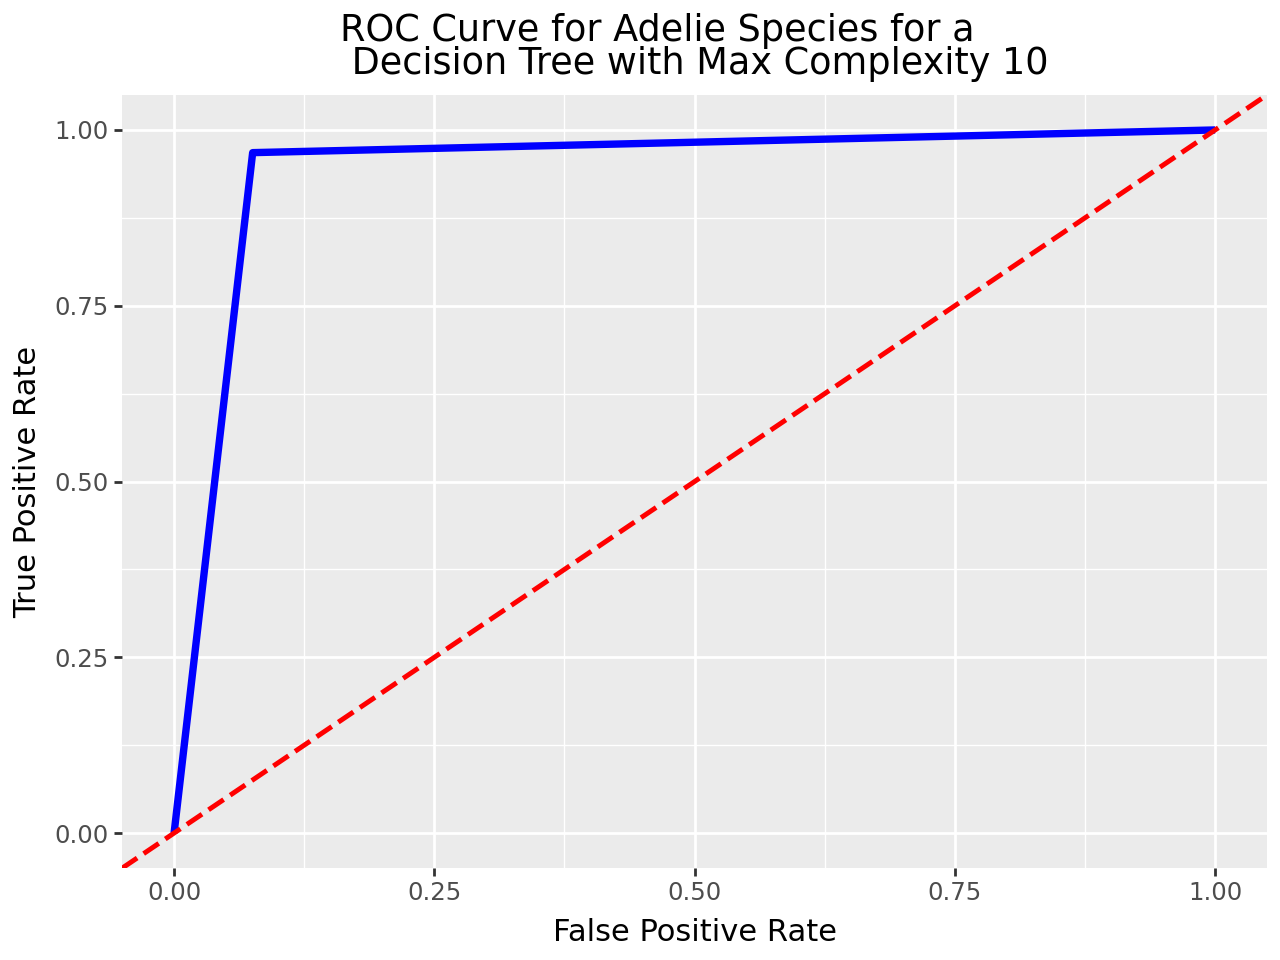

In [52]:
(pt.ggplot(roc_data, pt.aes(x="FPR", y="TPR")) +
    pt.geom_line(color="blue", size=1.5) +
    pt.geom_abline(slope=1, intercept=0, color="red", linetype="dashed", size=1) +
    pt.labs(
        title="ROC Curve for Adelie Species for a \n Decision Tree with Max Complexity 10",
        x="False Positive Rate",
        y="True Positive Rate"
    ) 
)

Our final model, a Decision Tree with a maximum complexity of 10, significantly outperformed a baseline model. This indicates that the model was highly effective and accurate in determining whether a penguin belonged to the Adelie species or not. The high accuracy suggests that the model captured meaningful patterns in the data, making it a robust tool for this classification task. Moreover, its success highlights the relevance of the selected features and the appropriateness of the model's complexity for the problem at hand.